# Import Required Libraries

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


# Create and Connect to SQLite Database

In [7]:
# Connect to SQLite (it will create the file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


 # Create Table and Insert Sample Data

In [22]:
# Create 'sales' table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data
sample_data = [
    ('Apples', 10, 2.5),
    ('Bananas', 5, 1.0),
    ('Oranges', 8, 1.8),
    ('Apples', 3, 2.5),
    ('Bananas', 7, 1.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()


# Run SQL Query to Summarize Sales

In [24]:
# Query to get total quantity and revenue per product
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
'''

# Read SQL query into DataFrame
df = pd.read_sql_query(query, conn)
print(df)


   product  total_qty  revenue
0   Apples         26     65.0
1  Bananas         24     24.0
2  Oranges         16     28.8


# Plot the Bar Chart

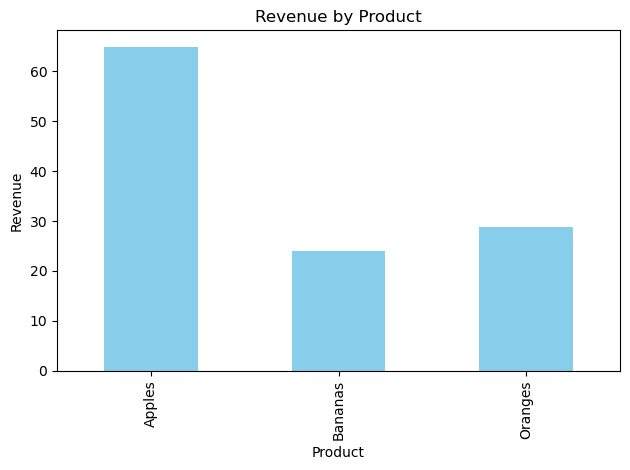

In [26]:
# Plotting the revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


# Top-selling product by revenue

In [28]:
query_top_product = '''
    SELECT 
        product, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product 
    ORDER BY revenue DESC 
    LIMIT 1
'''

df_top = pd.read_sql_query(query_top_product, conn)
print("💡 Top Selling Product (by Revenue):")
print(df_top)


💡 Top Selling Product (by Revenue):
  product  revenue
0  Apples     65.0


# Total overall revenue and quantity

In [30]:
query_totals = '''
    SELECT 
        SUM(quantity) AS total_quantity, 
        SUM(quantity * price) AS total_revenue 
    FROM sales
'''

df_totals = pd.read_sql_query(query_totals, conn)
print("📊 Overall Sales Summary:")
print(df_totals)


📊 Overall Sales Summary:
   total_quantity  total_revenue
0              66          117.8


# Close the Connection

In [9]:
conn.close()

## 📌 Project Summary – Task 7: Basic Sales Summary using SQL in Python

In this project, we used **SQLite** with **Python** to extract and summarize sales data from a small dataset. We practiced using SQL queries inside Python, loaded results using `pandas`, and visualized sales with `matplotlib`.

---

### ✅ Key Steps:
- 🔹 Created a SQLite database (`sales_data.db`)
- 🔹 Inserted sample sales data (product, quantity, price)
- 🔹 Ran SQL queries to calculate:
  - Total quantity and revenue per product
  - Top-selling product by revenue
  - Overall total sales (quantity and revenue)
- 🔹 Loaded SQL results into pandas DataFrame
- 🔹 Plotted a **bar chart** showing revenue by product

---

### 📊 Insights:
- 🍎 **Apples** generated the highest revenue among all products, making it the top-selling item.
- 💰 The **total revenue** from all products was **117.8**, with a **total quantity sold of  66**. 
- 📈 Visualizing sales made it easier to identify top-performing products — helpful for inventory, pricing, or marketing decisions.

---

### 🧰 Tools Used:
- 🐍 Python
- 🗃️ SQLite (`sqlite3`)
- 📊 pandas
- 📉 matplotlib

---

### 📥 Outcome:
By completing this task, we:
- ✅ Learned to write basic SQL queries
- ✅ Practiced loading SQL data into Python
- ✅ Performed simple data summaries
- ✅ Created our first sales chart!

